# Champion Analysis v1.5 - Mockingbird Prototype

*This notebook is a prototype for the Champion Analysis Notebook. It may be used in the final product upon adjustment and approval, designated as the visualizations notebook to compliment the Lightning Prototype.*

In [21]:
# Dependency Center
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import hvplot.pandas
import csv

## Lightning Protoype Import

In [22]:
# Import data from CSV
pokemon_df = pd.read_csv('Extractions/Refined Pokemon Roster.csv')
pokemon_df

,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Legendary,Mythical
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,27.56,15.21,False,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,39.37,28.66,False,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,78.74,220.46,False,False
3,Charmander,Fire,NaN,39,52,43,60,50,65,23.62,18.74,False,False
4,Charmeleon,Fire,NaN,58,64,58,80,65,80,43.31,41.89,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,Electric,NaN,80,100,50,100,50,200,47.24,319.67,True,False
894,Regidrago,Dragon,NaN,200,100,50,100,50,80,82.68,440.92,True,False
895,Glastrier,Ice,NaN,100,145,130,65,110,30,86.61,1763.70,True,False
896,Spectrier,Ghost,NaN,100,65,60,145,80,130,78.74,98.11,True,False


## Mockingbird Prototype Visualizations

### Type Distribution
*What are the most common types amongst Pokemon?*

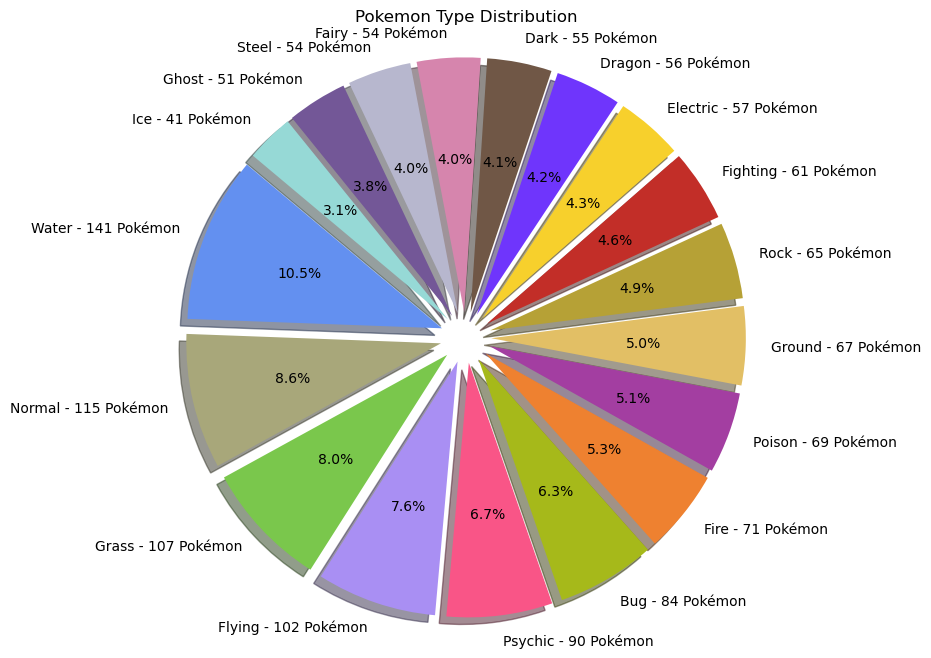

In [41]:
# Type Distribution Chart
# Concatenate the 'Primary Type' and 'Secondary Type' columns
all_types = pd.concat([pokemon_df['Primary Type'], pokemon_df['Secondary Type']])

# Remove any 'None' values
all_types = all_types[all_types != 'None']

# Get counts for each type
type_counts = all_types.value_counts()
# Define a list of colors
colors = [
    '#6390F0', # Water
    '#A8A77A', # Normal
    '#7AC74C', # Grass
    '#A98FF3', # Flying
    '#F95587', # Psychic
    '#A6B91A', # Bug
    '#EE8130', # Fire
    '#A33EA1', # Poison
    '#E2BF65', # Ground
    '#B6A136', # Rock
    '#C22E28', # Fighting
    '#F7D02C', # Electric
    '#6F35FC', # Dragon
    '#705746', # Dark
    '#D685AD', # Steel
    '#B7B7CE', # Fairy
    '#735797', # Ice
    '#96D9D6' # Ghost
    ]

# Define labels
labels = [f'{label} - {count} Pokémon' for label, count in zip(type_counts.index, type_counts.values)]

# Explode each slice a little bit to make the chart more appealing
explode = [0.1] * len(type_counts)

plt.figure(figsize=(10,8))
plt.pie(type_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.axis('equal')
plt.title('Pokemon Type Distribution')

# Save Figure
plt.savefig("Visualizations/Pokemon Type Distribution.png")

# Show Figure
plt.show()

### Highest Average Attack by Type
*Which type has the highest average attack stat?*

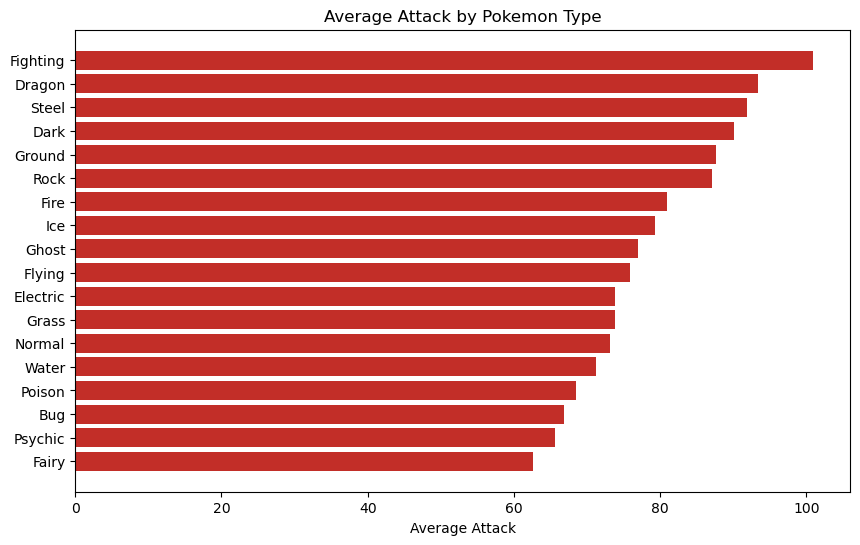

In [24]:
# Attack Distribution Chart
# Melt 'Primary Type' and 'Secondary Type' into one column
melted_df = pd.melt(pokemon_df, id_vars=['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                    value_vars=['Primary Type', 'Secondary Type'], 
                    var_name='Type Variable', value_name='Type').dropna()

# Group by 'Type' and calculate mean of 'Attack' for each group
type_attack_means = melted_df.groupby('Type')['Attack'].mean()

# Sort by the mean 'Attack'
type_attack_means = type_attack_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_attack_means.index, type_attack_means.values, color='#C22E28')

# Set the title and labels
plt.xlabel('Average Attack')
plt.title('Average Attack by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Attack by Pokemon Type.png')

# Show the plot
plt.show()

### Highest Average Special Attack by Type
*Which type has the highest average special attack stat?*

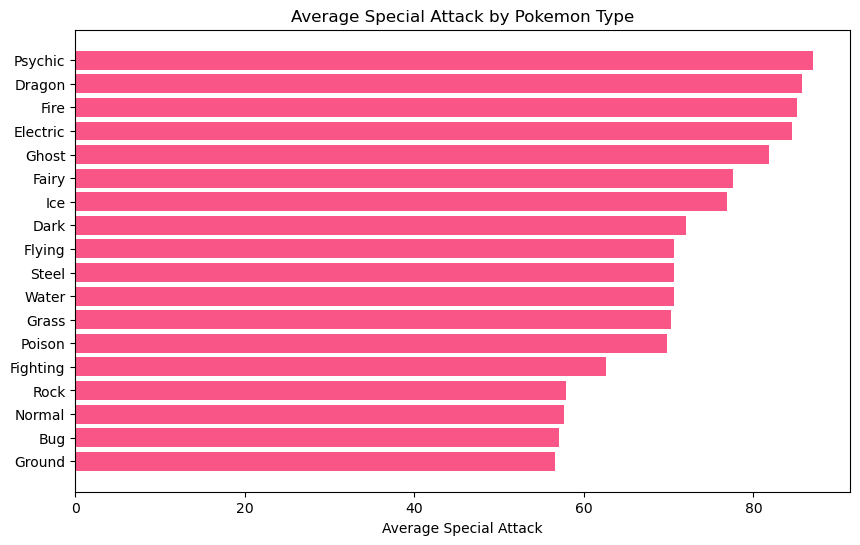

In [25]:
# Special Attack Distribution Chart
# Group by 'Type' and calculate mean of 'Sp. Atk' for each group
type_sp_attack_means = melted_df.groupby('Type')['Sp. Atk'].mean()

# Sort by the mean 'Sp. Atk'
type_sp_attack_means = type_sp_attack_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_sp_attack_means.index, type_sp_attack_means.values, color='#F95587')

# Set the title and labels
plt.xlabel('Average Special Attack')
plt.title('Average Special Attack by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Special Attack by Pokemon Type.png')

# Show the plot
plt.show()

### Highest Average Defense by Type
*Which type has the highest average defense stat?*

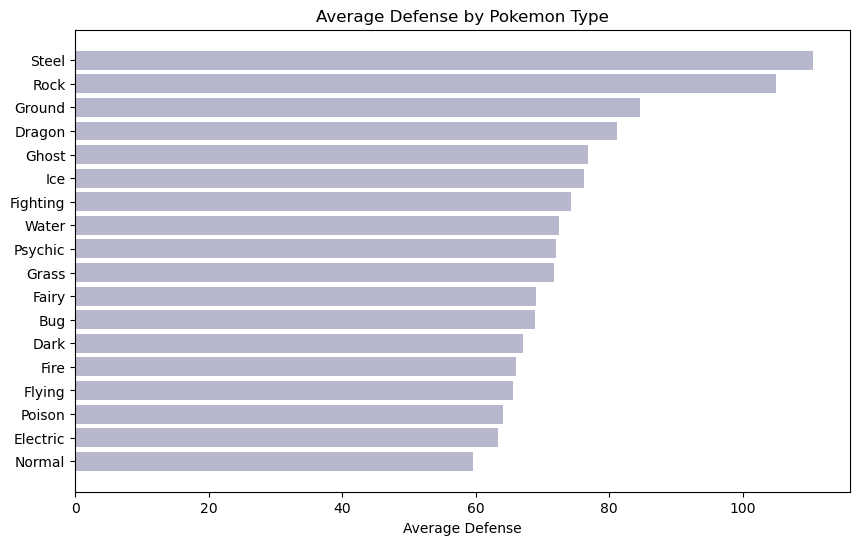

In [26]:
# Defense Distribution Chart
# Group by 'Type' and calculate mean of 'Defense' for each group
type_defense_means = melted_df.groupby('Type')['Defense'].mean()

# Sort by the mean 'Defense'
type_defense_means = type_defense_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_defense_means.index, type_defense_means.values, color='#B7B7CE')

# Set the title and labels
plt.xlabel('Average Defense')
plt.title('Average Defense by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Defense by Pokemon Type.png')

# Show the plot
plt.show()


### Highest Average Special Defense by Type
*Which type has the highest average special defense stat?*

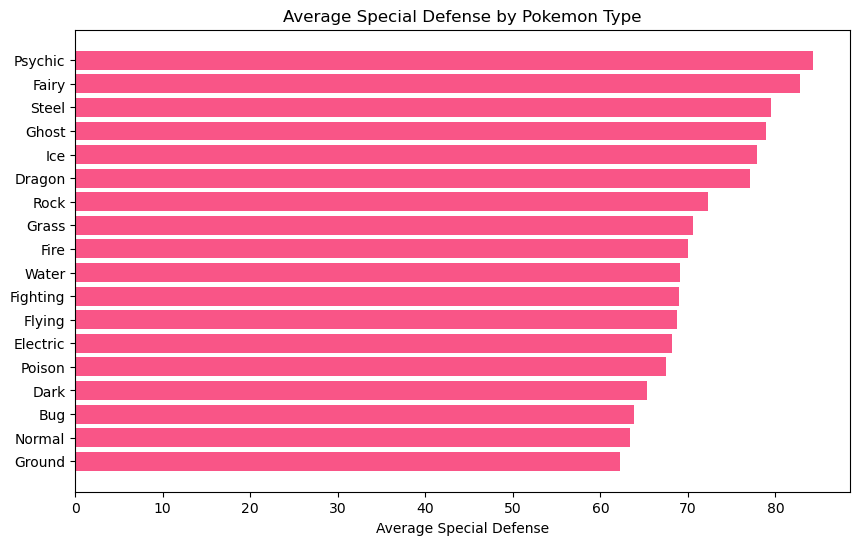

In [27]:
# Special Defense Distribution Chart
# Group by 'Type' and calculate mean of 'Sp. Def' for each group
type_sp_defense_means = melted_df.groupby('Type')['Sp. Def'].mean()

# Sort by the mean 'Sp. Def'
type_sp_defense_means = type_sp_defense_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_sp_defense_means.index, type_sp_defense_means.values, color='#F95587')

# Set the title and labels
plt.xlabel('Average Special Defense')
plt.title('Average Special Defense by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Special Defense by Pokemon Type.png')

# Show the plot
plt.show()

### Highest Average Speed by Type
*Which type has the highest average speed stat?*

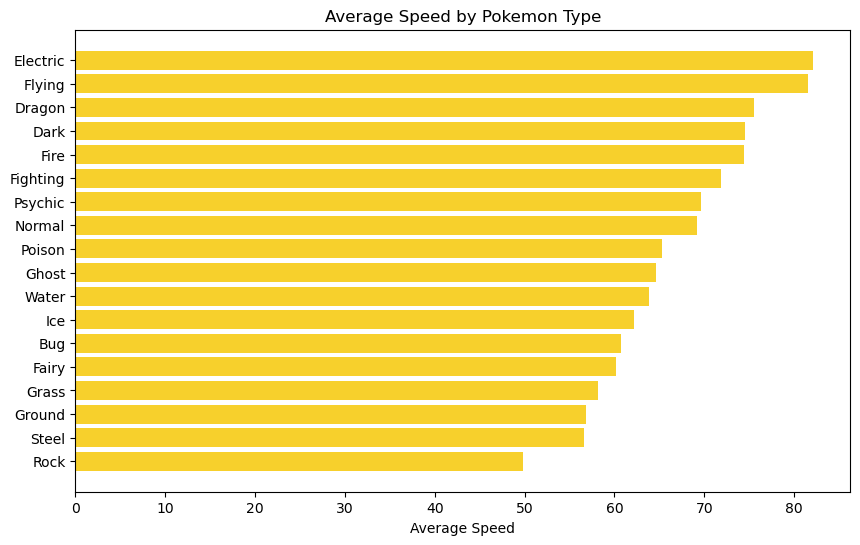

In [28]:
# Speed Distribution Chart
# Group by 'Type' and calculate mean of 'Speed' for each group
type_speed_means = melted_df.groupby('Type')['Speed'].mean()

# Sort by the mean 'Speed'
type_speed_means = type_speed_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_speed_means.index, type_speed_means.values, color='#F7D02C')

# Set the title and labels
plt.xlabel('Average Speed')
plt.title('Average Speed by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Speed by Pokemon Type.png')

# Show the plot
plt.show()

### Highest Average HP by Type
*Which type has the highest average HP stat?*

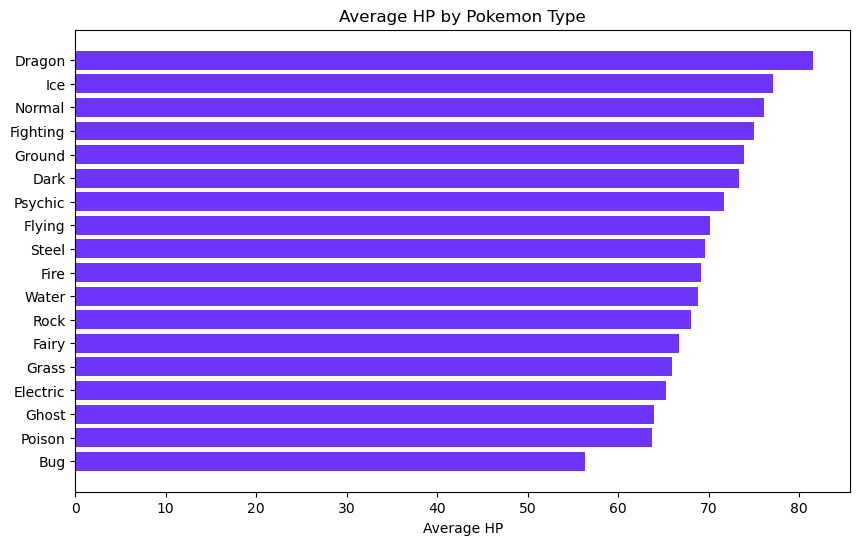

In [29]:
# HP Distribution Chart
# Group by 'Type' and calculate mean of 'HP' for each group
type_hp_means = melted_df.groupby('Type')['HP'].mean()

# Sort by the mean 'HP'
type_hp_means = type_hp_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_hp_means.index, type_hp_means.values, color='#6F35FC')

# Set the title and labels
plt.xlabel('Average HP')
plt.title('Average HP by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average HP by Pokemon Type.png')

# Show the plot
plt.show()

## Size and Stat Relationships
*How does the size of a Pokemon relate to its stats? To better understand the correlation (or lack thereof) between size and stats, we will be using various visualizations to compare the two.*

### Correlations Between Size and Health/Speed
*Does bigger and bulkier always mean healthier? Does smaller always mean faster?*

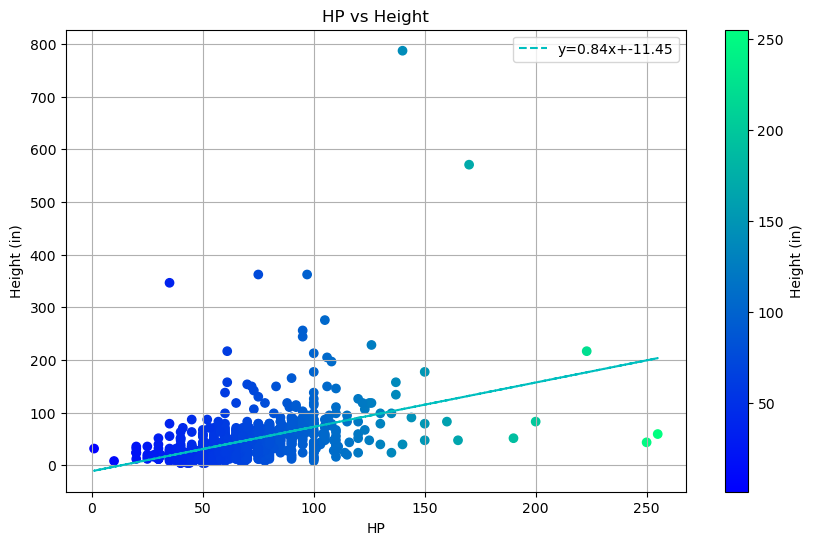

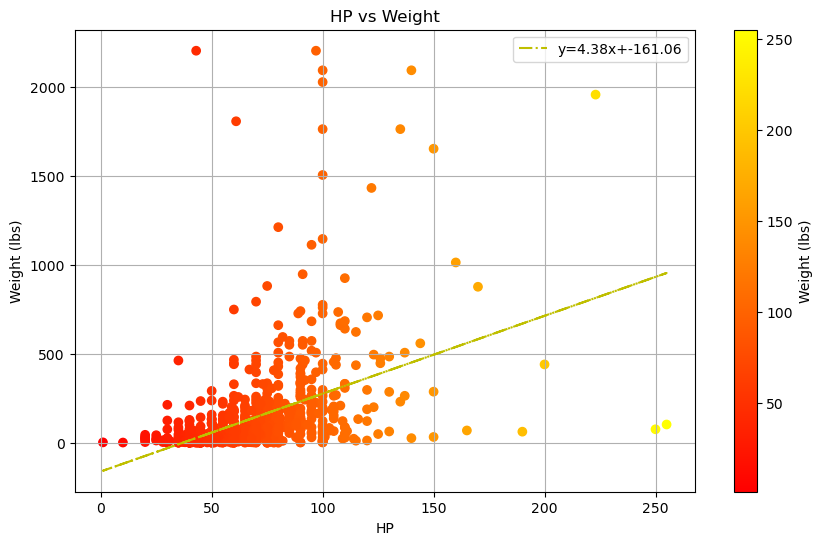

In [66]:
# Scatter plot: HP vs Height
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['HP'], pokemon_df['Height (in)'])
line = slope * pokemon_df['HP'] + intercept

plt.scatter(pokemon_df['HP'], pokemon_df['Height (in)'], c=pokemon_df['HP'], cmap='winter')
plt.plot(pokemon_df['HP'], line, 'c--', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Height (in)')
plt.xlabel('HP')
plt.ylabel('Height (in)')
plt.title('HP vs Height')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/HP vs Height.png')

# Show the plot
plt.show()

# Scatter plot: HP vs Weight
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['HP'], pokemon_df['Weight (lbs)'])
line = slope * pokemon_df['HP'] + intercept

plt.scatter(pokemon_df['HP'], pokemon_df['Weight (lbs)'], c=pokemon_df['HP'], cmap='autumn')
plt.plot(pokemon_df['HP'], line, 'y-.', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Weight (lbs)')
plt.xlabel('HP')
plt.ylabel('Weight (lbs)')
plt.title('HP vs Weight')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/HP vs Weight.png')

# Show the plot
plt.show()


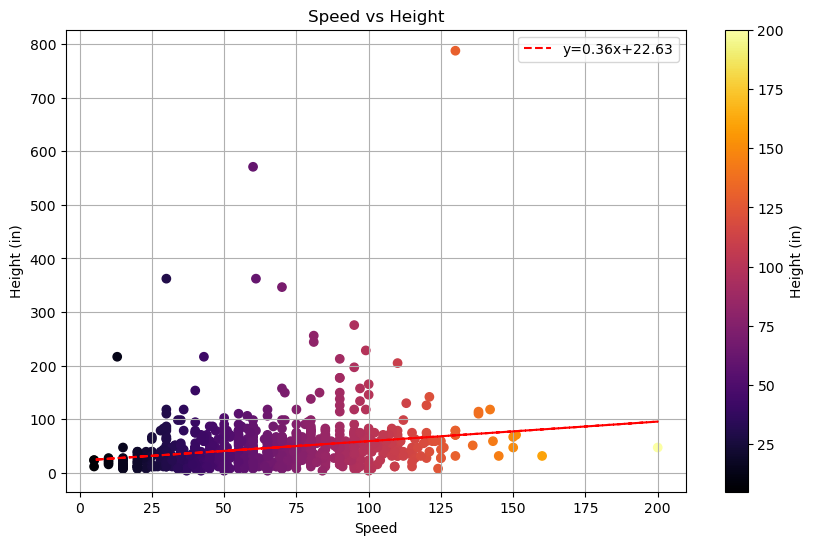

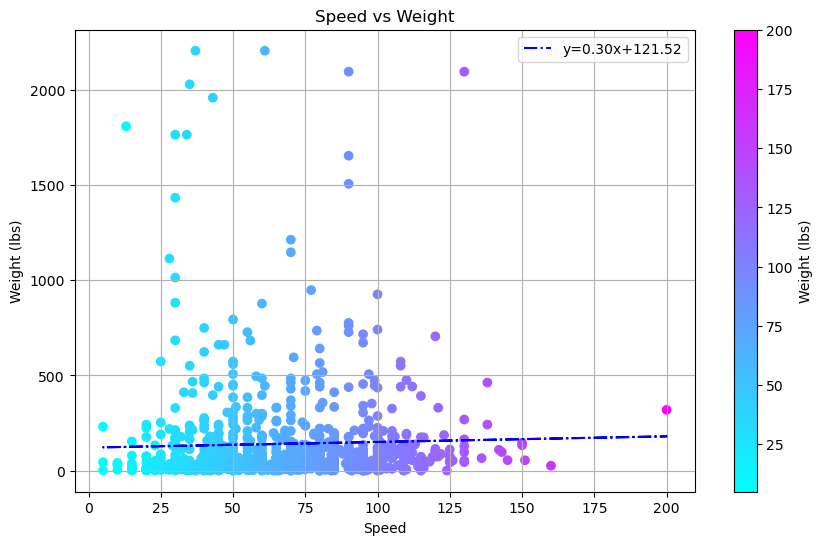

In [67]:
# Scatter plot: Speed vs Height
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Speed'], pokemon_df['Height (in)'])
line = slope * pokemon_df['Speed'] + intercept

plt.scatter(pokemon_df['Speed'], pokemon_df['Height (in)'], c=pokemon_df['Speed'], cmap='inferno')
plt.plot(pokemon_df['Speed'], line, 'r--', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Height (in)')
plt.xlabel('Speed')
plt.ylabel('Height (in)')
plt.title('Speed vs Height')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Speed vs Height.png')

# Show the plot
plt.show()

# Scatter plot: Speed vs Weight
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Speed'], pokemon_df['Weight (lbs)'])
line = slope * pokemon_df['Speed'] + intercept

plt.scatter(pokemon_df['Speed'], pokemon_df['Weight (lbs)'], c=pokemon_df['Speed'], cmap='cool')
plt.plot(pokemon_df['Speed'], line, 'b-.', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Weight (lbs)')
plt.xlabel('Speed')
plt.ylabel('Weight (lbs)')
plt.title('Speed vs Weight')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Speed vs Weight.png')

# Show the plot
plt.show()



### Correlations Between Size and Offensive Stats
*Does bigger and bulkier always mean stronger?*

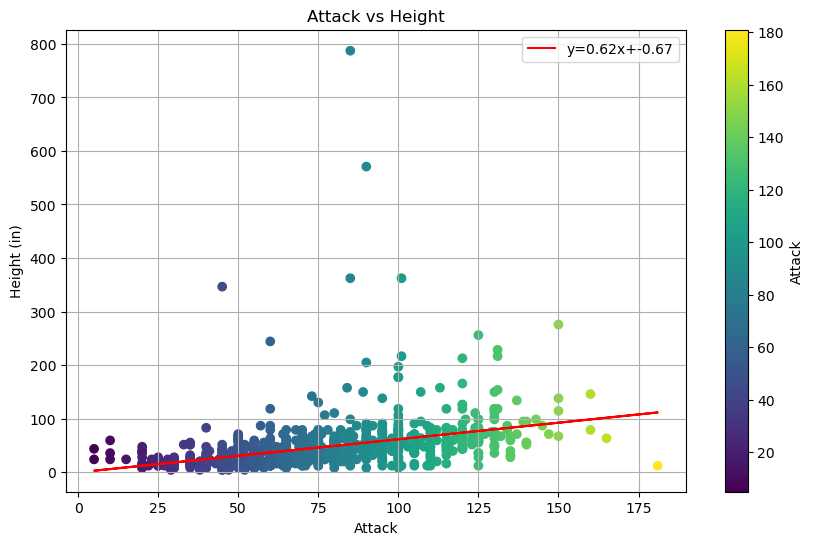

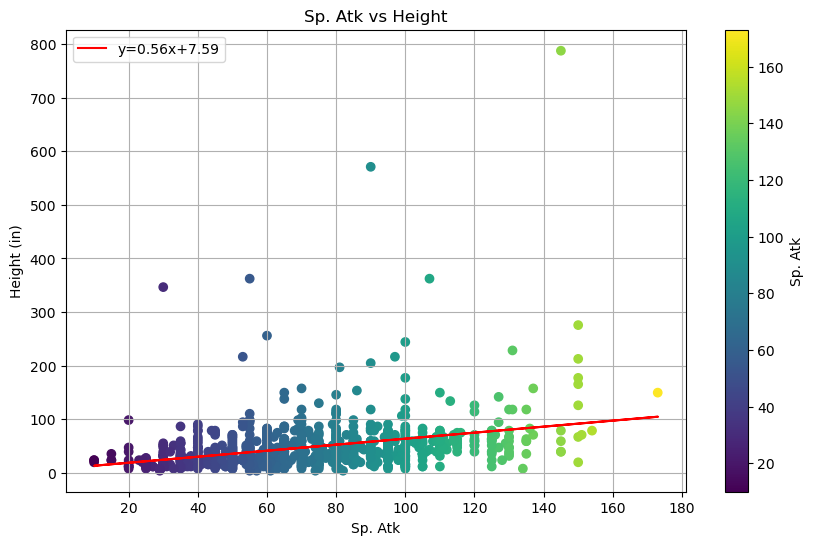

In [68]:
# Scatter plot: Attack vs Height
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Attack'], pokemon_df['Height (in)'])
line = slope * pokemon_df['Attack'] + intercept

plt.scatter(pokemon_df['Attack'], pokemon_df['Height (in)'], c=pokemon_df['Attack'], cmap='viridis')
plt.plot(pokemon_df['Attack'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Attack')
plt.xlabel('Attack')
plt.ylabel('Height (in)')
plt.title('Attack vs Height')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Attack vs Height.png')

# Show the plot
plt.show()

# Scatter plot: Sp. Atk vs Height
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Sp. Atk'], pokemon_df['Height (in)'])
line = slope * pokemon_df['Sp. Atk'] + intercept

plt.scatter(pokemon_df['Sp. Atk'], pokemon_df['Height (in)'], c=pokemon_df['Sp. Atk'], cmap='viridis')
plt.plot(pokemon_df['Sp. Atk'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Sp. Atk')
plt.xlabel('Sp. Atk')
plt.ylabel('Height (in)')
plt.title('Sp. Atk vs Height')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Sp. Atk vs Height.png')

# Show the plot
plt.show()



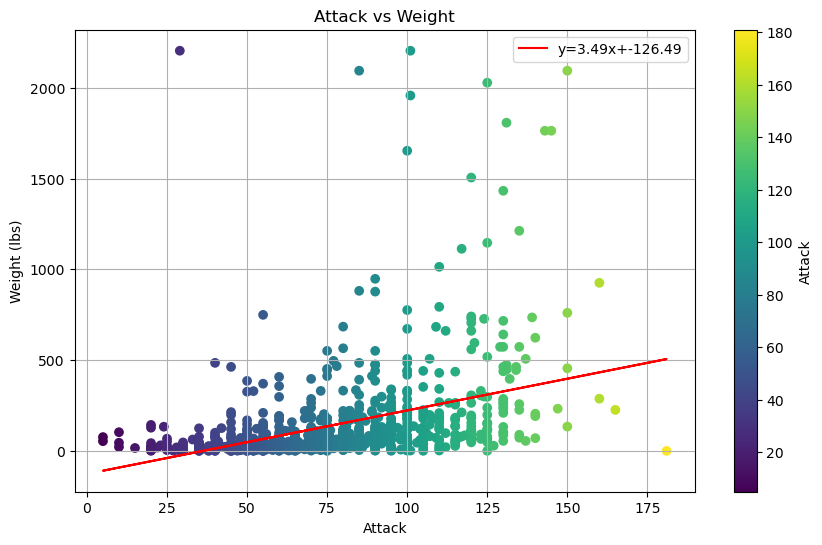

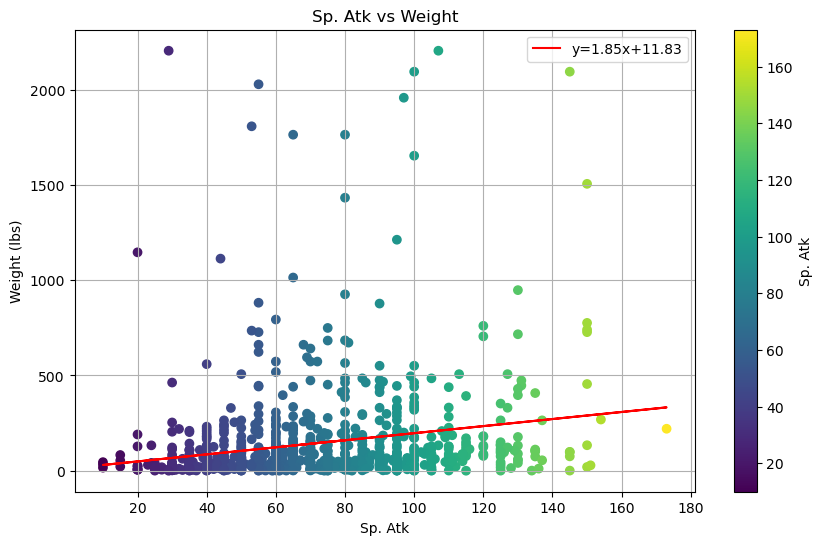

In [69]:
# Scatter plot: Attack vs Weight
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Attack'], pokemon_df['Weight (lbs)'])
line = slope * pokemon_df['Attack'] + intercept

plt.scatter(pokemon_df['Attack'], pokemon_df['Weight (lbs)'], c=pokemon_df['Attack'], cmap='viridis')
plt.plot(pokemon_df['Attack'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Attack')
plt.xlabel('Attack')
plt.ylabel('Weight (lbs)')
plt.title('Attack vs Weight')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Attack vs Weight.png')

# Show the plot
plt.show()

# Scatter plot: Sp. Atk vs Weight
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Sp. Atk'], pokemon_df['Weight (lbs)'])
line = slope * pokemon_df['Sp. Atk'] + intercept

plt.scatter(pokemon_df['Sp. Atk'], pokemon_df['Weight (lbs)'], c=pokemon_df['Sp. Atk'], cmap='viridis')
plt.plot(pokemon_df['Sp. Atk'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Sp. Atk')
plt.xlabel('Sp. Atk')
plt.ylabel('Weight (lbs)')
plt.title('Sp. Atk vs Weight')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Sp. Atk vs Weight.png')

# Show the plot
plt.show()


### Correlations Between Size and Defensive Stats
*Does bigger and bulkier always mean more defensive?*

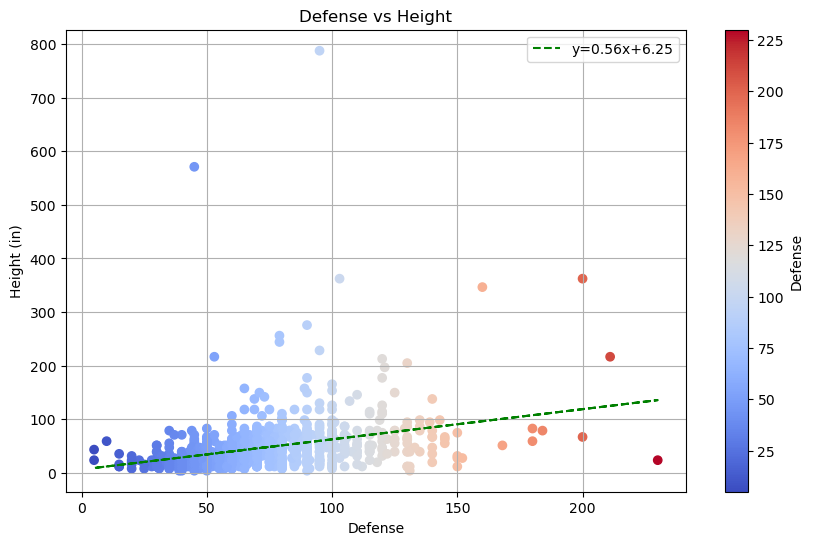

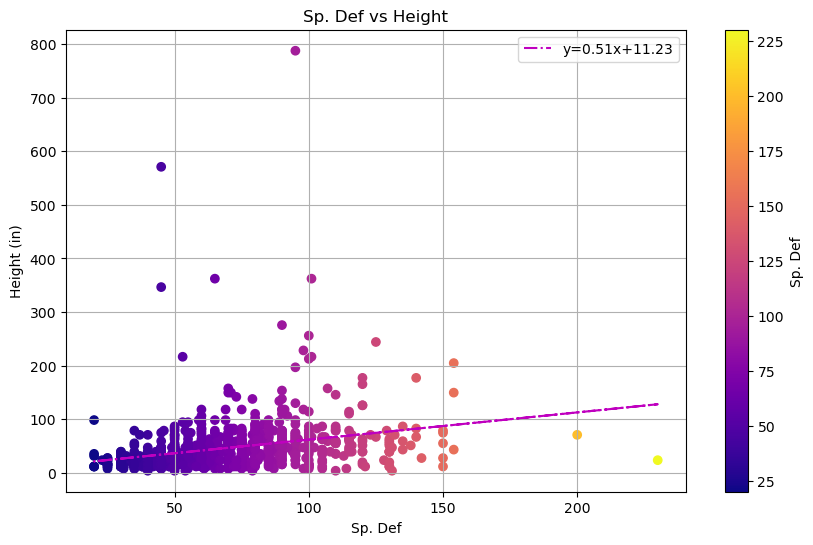

In [70]:
# Scatter plot: Defense vs Height
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Defense'], pokemon_df['Height (in)'])
line = slope * pokemon_df['Defense'] + intercept

plt.scatter(pokemon_df['Defense'], pokemon_df['Height (in)'], c=pokemon_df['Defense'], cmap='coolwarm')
plt.plot(pokemon_df['Defense'], line, 'g--', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Defense')
plt.xlabel('Defense')
plt.ylabel('Height (in)')
plt.title('Defense vs Height')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Defense vs Height.png')

# Show the plot
plt.show()

# Scatter plot: Sp. Def vs Height
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Sp. Def'], pokemon_df['Height (in)'])
line = slope * pokemon_df['Sp. Def'] + intercept

plt.scatter(pokemon_df['Sp. Def'], pokemon_df['Height (in)'], c=pokemon_df['Sp. Def'], cmap='plasma')
plt.plot(pokemon_df['Sp. Def'], line, 'm-.', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Sp. Def')
plt.xlabel('Sp. Def')
plt.ylabel('Height (in)')
plt.title('Sp. Def vs Height')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Sp. Def vs Height.png')

# Show the plot
plt.show()


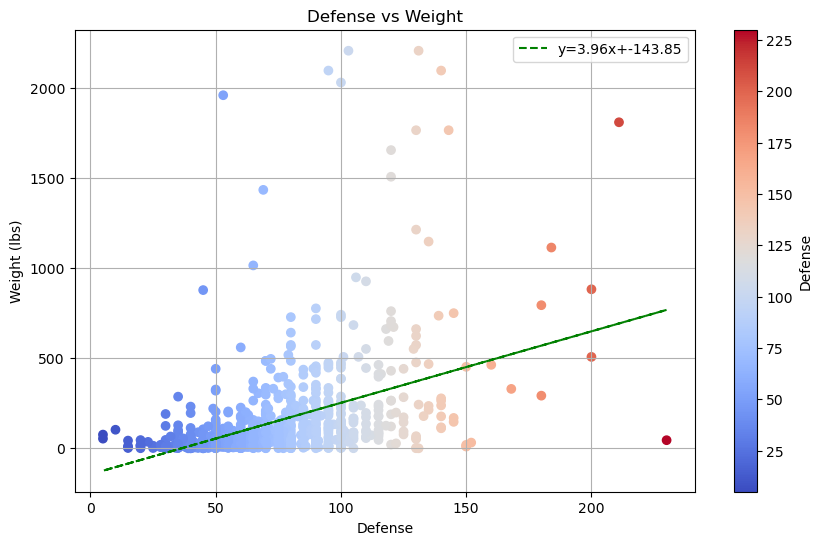

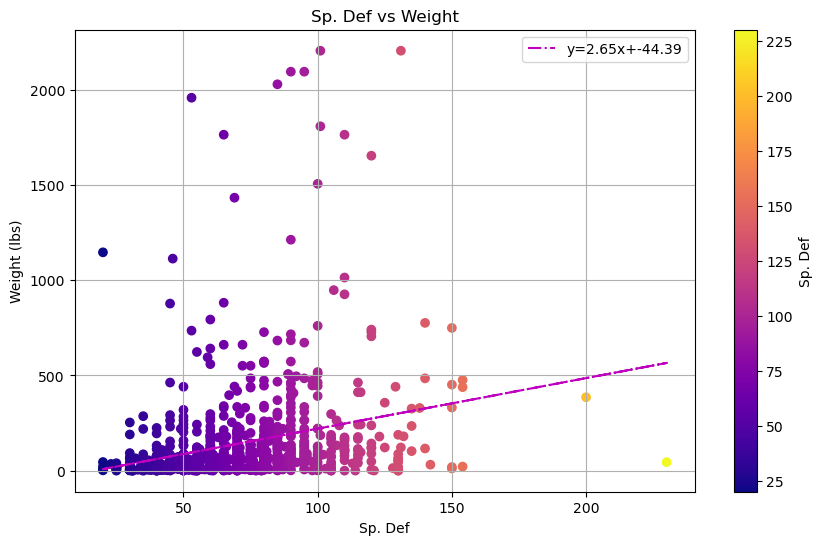

In [71]:
# Scatter plot: Defense vs Weight
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Defense'], pokemon_df['Weight (lbs)'])
line = slope * pokemon_df['Defense'] + intercept

plt.scatter(pokemon_df['Defense'], pokemon_df['Weight (lbs)'], c=pokemon_df['Defense'], cmap='coolwarm')
plt.plot(pokemon_df['Defense'], line, 'g--', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Defense')
plt.xlabel('Defense')
plt.ylabel('Weight (lbs)')
plt.title('Defense vs Weight')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Defense vs Weight.png')

# Show the plot
plt.show()

# Scatter plot: Sp. Def vs Weight
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Sp. Def'], pokemon_df['Weight (lbs)'])
line = slope * pokemon_df['Sp. Def'] + intercept

plt.scatter(pokemon_df['Sp. Def'], pokemon_df['Weight (lbs)'], c=pokemon_df['Sp. Def'], cmap='plasma')
plt.plot(pokemon_df['Sp. Def'], line, 'm-.', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Sp. Def')
plt.xlabel('Sp. Def')
plt.ylabel('Weight (lbs)')
plt.title('Sp. Def vs Weight')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('Visualizations/Sp. Def vs Weight.png')

# Show the plot
plt.show()


### Correlation Heatmap
*Correlation coefficients for aforementioned comparisons and more.*

C:\Users\WolfA\AppData\Local\Temp\ipykernel_9312\1812140298.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_df.corr()


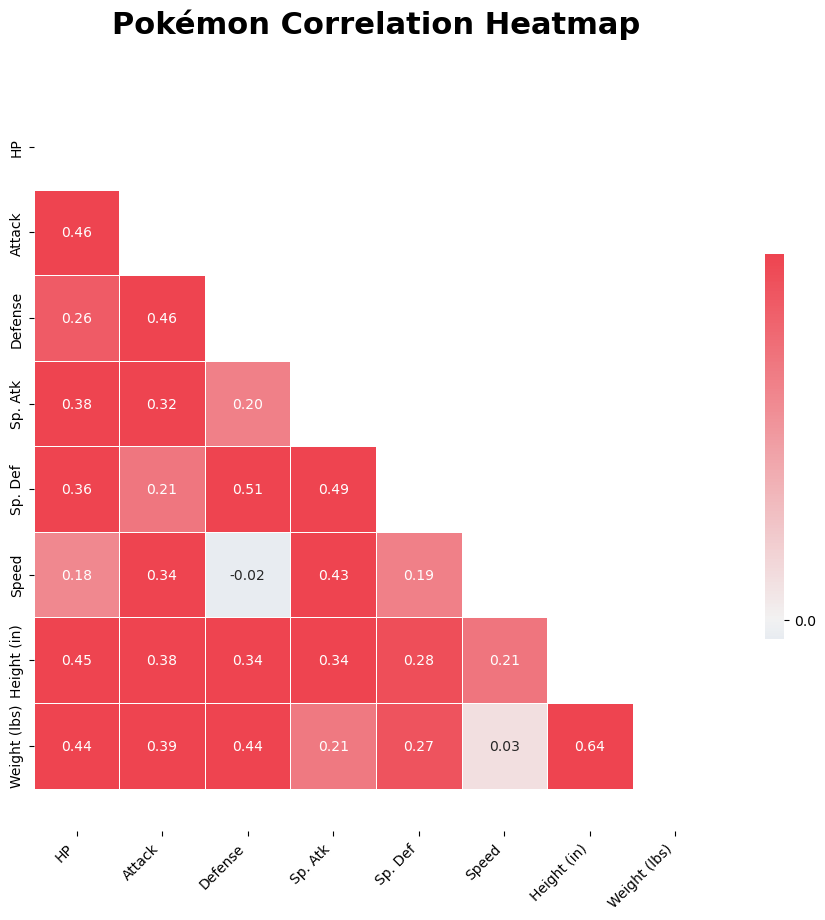

In [36]:
# Correlation Heatmap
# Drop 'Legendary' and 'Mythical' columns
corr_df = pokemon_df.drop(['Legendary', 'Mythical'], axis=1)

# Calculate the correlation matrix
corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Create a custom colormap
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .5, "ticks" : [-1, -.5, 0, 0.5, 1]})

# Title for the heatmap
ax.set_title('Pokémon Correlation Heatmap', fontsize=22, fontweight='bold', pad=20)

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Rotate the bottom labels
plt.xticks(rotation=45, ha='right')

# Save the plot
plt.savefig('Visualizations/Correlation Heatmap.png')

# Show the plot
plt.show()


## The Team of a Champion
*Taking into consideration the previous visualizations, what would the Champion's team look like? In an official Pokemon Championship match, Legendaries and Mythicals are not allowed, and only a team of six are allowed to compete on each side.*

*We aim to answer three questions at this point:*
* *What team of six can we build with each Pokemon representing the highest individual stat?*
* *What team of six has the highest total stats?*
* *Which of the two teams would provide the best chance of winning and why?*

In [37]:
# Create a new DataFrame for Regular Pokemon (non-Legendary and non-Mythical)
regular_pokemon = pokemon_df.loc[(pokemon_df['Legendary'] == False) & (pokemon_df['Mythical'] == False)]

# Create a new DataFrame for Legendary and Mythical Pokemon together
elite_pokemon = pokemon_df.loc[(pokemon_df['Legendary'] == True) | (pokemon_df['Mythical'] == True)]

In [38]:
# Create a team of six Pokemon, each with the highest individual stat
# Pokemon with the highest HP
highest_hp = regular_pokemon.loc[regular_pokemon['HP'].idxmax()]

# Pokemon with the highest Attack
highest_attack = regular_pokemon.loc[regular_pokemon['Attack'].idxmax()]

# Pokemon with the highest Defense
highest_defense = regular_pokemon.loc[regular_pokemon['Defense'].idxmax()]

# Pokemon with the highest Sp. Atk
highest_sp_atk = regular_pokemon.loc[regular_pokemon['Sp. Atk'].idxmax()]

# Pokemon with the highest Sp. Def
highest_sp_def = regular_pokemon.loc[regular_pokemon['Sp. Def'].idxmax()]

# Pokemon with the highest Speed
highest_speed = regular_pokemon.loc[regular_pokemon['Speed'].idxmax()]

# Create a DataFrame for the team of six Pokemon
sixset_one = pd.DataFrame([highest_hp, highest_attack, highest_defense, highest_sp_atk, highest_sp_def, highest_speed])

# Display the team of six Pokemon
sixset_one


,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Legendary,Mythical
241,Blissey,Normal,NaN,255,10,10,75,135,55,59.06,103.18,False,False
797,Kartana,Grass,Steel,59,181,131,59,31,109,11.81,0.22,False,False
212,Shuckle,Bug,Rock,20,10,230,10,230,5,23.62,45.19,False,False
795,Xurkitree,Electric,NaN,83,89,71,173,71,83,149.61,220.46,False,False
212,Shuckle,Bug,Rock,20,10,230,10,230,5,23.62,45.19,False,False
290,Ninjask,Bug,Flying,61,90,45,50,50,160,31.50,26.46,False,False


*This team consists of Blissey (top HP), Kartana (top Attack), two Shuckles (top Defense and Sp. Def), Xurkitree (top Sp. Atk), and Ninjask (top Speed).*

In [60]:
# Pokemon Size Stats
# Determine the five shortest Pokemon
shortest_pokemon = regular_pokemon.nsmallest(5, 'Height (in)')

# Determine the five tallest Pokemon
tallest_pokemon = regular_pokemon.nlargest(5, 'Height (in)')

# Determine the five lightest Pokemon
lightest_pokemon = regular_pokemon.nsmallest(5, 'Weight (lbs)')

# Determine the five heaviest Pokemon
heaviest_pokemon = regular_pokemon.nlargest(5, 'Weight (lbs)')

# Compile these results into a DataFrame
size_stats = pd.concat([shortest_pokemon, tallest_pokemon, lightest_pokemon, heaviest_pokemon])

# Display the DataFrame
size_stats

,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Legendary,Mythical,Total Stats
763,Comfey,Fairy,NaN,51,52,90,82,110,100,3.94,0.66,False,False,485
594,Joltik,Bug,Electric,50,47,50,57,50,65,3.94,1.32,False,False,319
853,Sinistea,Ghost,NaN,40,45,45,74,54,50,3.94,0.44,False,False,308
741,Cutiefly,Bug,Fairy,40,45,40,55,40,84,3.94,0.44,False,False,304
668,Flabebe,Fairy,NaN,44,38,39,61,79,42,3.94,0.22,False,False,303
320,Wailord,Water,NaN,170,90,45,90,45,60,570.87,877.44,False,False,500
796,Celesteela,Steel,Flying,97,101,103,107,101,61,362.20,2204.40,False,False,570
207,Steelix,Steel,Ground,75,85,200,55,65,30,362.20,881.85,False,False,510
94,Onix,Rock,Ground,35,45,160,30,45,70,346.46,462.97,False,False,385
129,Gyarados,Water,Flying,95,125,79,60,100,81,255.91,518.09,False,False,540


*In terms of size stats, the team consists of the following:*
* *Shortest Pokemon: Comfey, Joltik, Flabebe, Cutiefly, or Sinistea - 3.94 inches (about the size of a credit card)*
* *Tallest Pokemon: Wailord - 47.7 feet (about as tall as the Hollywood Sign)*
* *Lightest Pokemon: Kartana, Gastly, Haunter, or Flabebe- 0.2 pounds (about the weight of a deck of cards)*
* *Heaviest Pokemon: Celesteela - 2204.4 pounds (about half the weight of a rhino)*

In [59]:
# Create a team of six Pokemon with the highest total stats
# Create a new column for the total stats
regular_pokemon['Total Stats'] = regular_pokemon['HP'] + regular_pokemon['Attack'] + regular_pokemon['Defense'] + regular_pokemon['Sp. Atk'] + regular_pokemon['Sp. Def'] + regular_pokemon['Speed']

# Sort the DataFrame by the total stats
regular_pokemon = regular_pokemon.sort_values(by='Total Stats', ascending=False)

# Create a DataFrame for the team of six Pokemon
sixset_two = regular_pokemon.iloc[:6]

# Display the team of six Pokemon
sixset_two

,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Legendary,Mythical,Total Stats
288,Slaking,Normal,NaN,150,160,100,95,65,100,78.74,287.70,False,False,670
247,Tyranitar,Rock,Dark,100,134,110,95,100,61,78.74,445.33,False,False,600
783,Kommo-o,Dragon,Fighting,75,110,125,100,105,85,62.99,172.40,False,False,600
372,Salamence,Dragon,Flying,95,135,80,110,80,100,59.06,226.19,False,False,600
375,Metagross,Steel,Psychic,80,135,130,95,90,70,62.99,1212.54,False,False,600
444,Garchomp,Dragon,Ground,108,130,95,80,85,102,74.80,209.44,False,False,600


*This team consists of Slaking (who has the highest Total Stat Count of all regular Pokemon) and any combination of those with a 600 Total Stat Count, which includes Dragonite, Tyranitar, Salamence, Metagross, Garchomp, Hydreigon, Goodra, Kommo-o, and Dragapult.*

## Analysis Results and Conclusions

*Through the use of various visualizations and tests, we have been able to determine the following:*
* *The most common types amongst Pokemon are Water, Normal, and Grass.*
* *The rarest types amongst Pokemon are Ice, Ghost, and a draw between Steel and Fairy.*
* *The type with the highest average attack stat is Fighting, despite the highest attack stat belonging to a Grass/Steel Pokemon.*
* *The type with the highest average special attack stat is Psychic, despite the highest special attack stat belonging to an Electric Pokemon.*
* *The type with the highest average defense stat is Steel, despite the highest defense belonging to a Bug/Rock Pokemon.*
* *The type with the highest average special defense stat is Psychic, despite the highest special defense belonging to a Bug/Rock Pokemon.*
* *The type with the highest average speed stat is Electric, despite the highest speed stat belonging to a Bug/Flying Pokemon.*
* *The type with the highest average HP stat is Dragon, despite the highest HP stat belonging to a Normal Pokemon.*
* *Amongst the customizable team of six with the highest total stats, the most common type is Dragon, a testament to their incredible overall power.*
* *Though we did not cover abilities in this study, it is worth noting that, although Slaking has the highest total stats, its ability, Truant, makes it skip every other turn, making it a poor choice for a team.*
* *Neither the heaviest nor the tallest Pokemon are amongst the top six in any stat, but the one of the lightest Pokemon, Kartana, is the top Attack stat holder.*
* *The ideal team for the Pokemon Championships, a grueling test of strength and endurance, would consist of any combination of the 600 Base Stat Club, which includes Dragonite, Tyranitar, Salamence, Metagross, Garchomp, Hydreigon, Goodra, Kommo-o, and Dragapult.*